# Wildflower germination

> Every species has some mechanism for delaying germination until after the seed has been dispersed. The Science of Seed Germination is the discovery and description of such mechanisms and the development of procedures for removing them so that the seeds can germinate. - Norman C. Deno

There are a wide range of germination conditions for regional wildflowers. This experiment tests which of 83 wildflower species germinate under the simple conditions of "household" conditions, namely being kept moist at 20 degrees Celsius, and exposed to the moderate light from a large easterly facing window and houselights. The results are compared against three reference sources for germination instructions.

In [1]:
# Final notebook for the 2021 germination project

# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math
from scipy import ndimage

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

# create column of mutually exclusive plant characteristics from dataset
spdint1 = spd[spd["inv"]!="X"].copy()
spdint1["allstats"] = spdint1["inv"]
spdint2 = spd[spd["ns"]!="X"].copy()
spdint2["allstats"] = spdint2["ns"]
spdint3 = spd[spd["rch"]!="X"].copy()
spdint3["allstats"] = spdint3["rch"]
spdint4 = spd[spd["ni"]!="X"].copy()
spdint4["allstats"] = spdint4["ni"]
spdint5 = spd[spd["ongen"]!="X"].copy()
spdint5["allstats"] = spdint5["ongen"]
spd_allstats = pd.concat([spdint1, spdint2, spdint3, spdint4, spdint5])

# create yearly data for later charting use
spd1 = spd_allstats.loc[spd_allstats.year == 1].copy()
spd2 = spd_allstats.loc[(spd_allstats["year"] == 2)].copy()

# import germination data
ger=pd.read_csv("resources/germ_data.csv")
ger["pdate"] = pd.to_datetime(ger['pdate'], errors='coerce', format='%d/%m/%y')

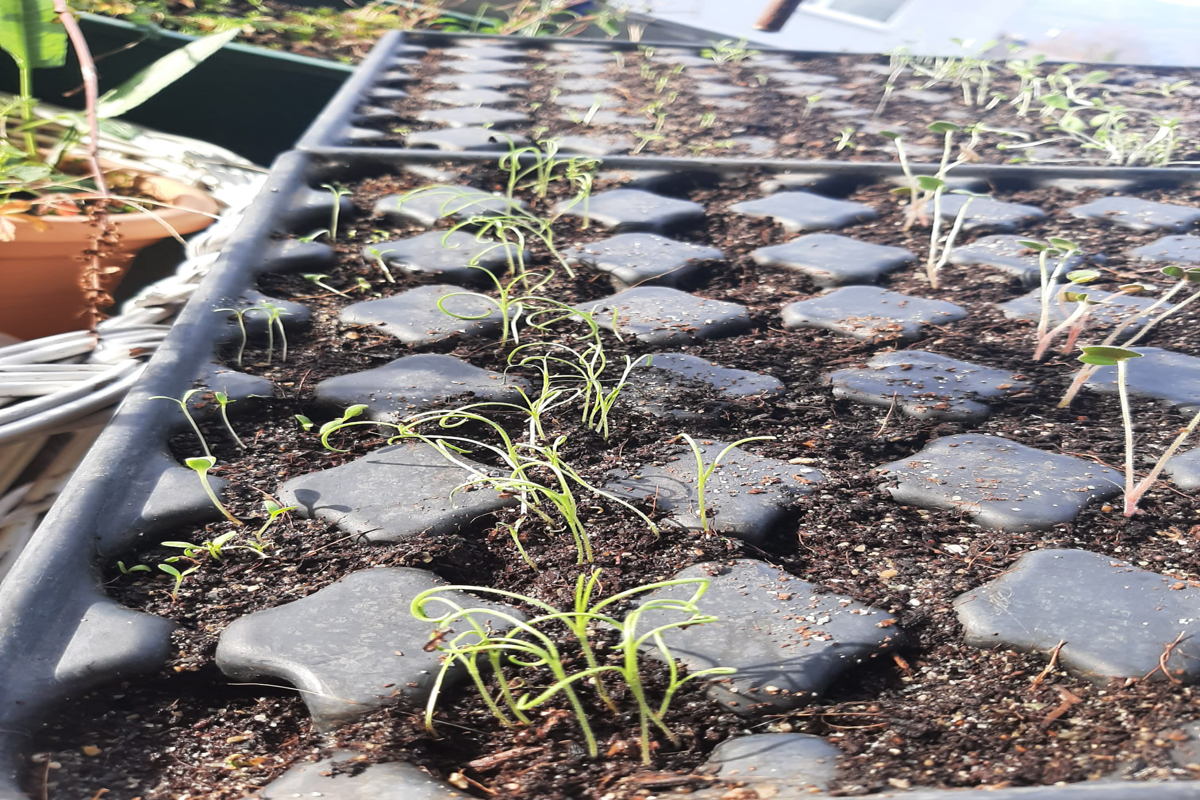

In [2]:
def display_image_ipython(file_location, thumb=(1200, 700), rotates=0):
    """Convenience method to use PIL and Ipython to display images.

    :param file_location: The location of the file relative location of the file
    :type file_location: string
    :param thumb: The size of the image
    :type thumb: tuple, integers
    :return: displays the image or a message that the image could not be displayed
    :rtype: displayed image
    """

    try:        
        if rotates == 0:
            r=PILImage.open(file_location).convert("RGBA")
            r = r.resize(thumb)
        else:
            
            r = PILImage.open(file_location).convert("RGBA")
            r = r.resize(thumb)            
            r = r.rotate(angle = rotates, expand=False)
            
        
        display(r)

    except:
        print(f"could not load image {file_location} ")

display_image_ipython("resources/images/germ-1.jpeg", thumb=(1200,800), rotates=0)

*__Figure 1 :__ Tragopogon pratensis sprouts enjoying some late October sunshine on a balcony*

## Methodology

### Choice and source of seeds
The seeds were chosen to be native wildtype species within either the personal collection of Gabrial Erismann or the inventory of Port 34. The choice of seeds reflected several criteria:
* some were chosen to represent a specific and ecologically interesting biotope near Biel
* some older seeds (<2018) were chosen simply because they were on hand
* some ripe seeds were harvested around Biel and La Chaux-de-Fonds at the beginning of the experiment.

### Experiment timing
The experiment ran from the 12th of October to the 28th of November. The final planting of seeds occured on the 23rd of October.

This experiment attemps to answer the question of whether a given amount of seeds yields "no germination" "low germination", "moderate germination" and "high germination." As an initial investigation into seed germination, it was decided to keep the methodology as simple as possible. During October seeds were planted and monitored until the final week of November, when the results will be presented and a determination made on further experiments. Germinated seedlings will be transferred to more appropriate growing conditions and a new set of seeds for germination experiments will be put into place. 

### Germination medium
The germination medium used was the following mix (all certified organic):
* 1/3 coconut coir
* 1/3 sand
* 1/3 seedling dirt from Coop OECO plan brand

The mix was placed into either plastic seedling trays or concrete germination trays. This mix was chosen after research and discussions concluded that this was a reasonable medium with the following useful properties:
* simple and available with organic certification
* stays moist without becoming waterlogged. 
* thick enough medium that seeds can be buried and thus exposed to darkness at the same time as other seeds can be left at the surface of the medium for light exposure.
* does not require instant transplanting the moment seedlings germinate
 even just "succesful" germination defined as got enough plants from my seeds to serve my purpose.
 
 ### Watering protocol
For the first three weeks, the seedlings were watered via spray bottle 2-4 times a day depending on the drynesss of the growing medium and whether I was available to water. This protocol was decided for the followign reasons:
* minimize mess in appartment setting
* simulate wind and thus strengthen leggy sprouts
* minimize impact of watering on the germination medium

For the week starting November 1st, the water methodology was changed to the following:
* The seedlings would be sprayed every day, but with less water.
* Initially the trays were watered every three days with bottles over a freshly sprayed surface. Although this altered the germination medium somewhat, it allowed the deeper portions to remain moist for proper root formation.
* This likely resulted in some seeds and seedlings being lost as this regimen allowed the medium to dry out significantly several times at the surface.
* On November 15th, it was decided to water the plants every 2 days, which resolved the problem of the medium becoming dry.

### Light exposure
For each species, a layer of seeds was left exposed to ambient light on the surface and a layer of seeds was buried 1-2 cm below the surface of the germination medium, thus exposed to darkness. The seeds were placed into two locations, both exposed to the following sources of light:
1) Indirect and direct sunlight through a medium sized south-east and a large south-west facing window. 
2) Standard household fluorescent lighting used to light up the room
3) Direct exposure to 3-4 hours of sunlight during sunny afternoons when possible (on about 8 occasions).

### Temperature
The temperature was kept at a constant of around 20-22 degrees Celsius due to the location of the germination trays directly above heating units. During the sunny afternoons the plants were exposed to significantly lower temperatures (12-15 degrees Celsius) at short intervals which may have affected the germination rates.

In [3]:
# line up some photos of the germination set-up

## Results

A significant number of wildflowers germinated. As the below chart shows...

In [4]:
# first pass analysis - germinate or not ?

# all species with more than 0 germination at end of experiment
nonzero = ger.loc[ger["2021-11-28"] >0]

# Table of Top 10 species with highest germination at end of experiment

# all species with 0 germination at end of experiment
zero = ger.loc[ger["2021-11-28"] ==0]

# make reference table for annex chapter of species that did not germinate


In [6]:
# Second pass - quantities and time series

# first need to separate into container types and makes two useful columns:
# 1) for plastic-tray we need a "ratio" column made of a ratio of values under each date except the final date
# 2) for concrete-container we need to replace "full" with an integer value.
# 3) for both plastic-tray and concrete-container we need "days since planting date (pdate column)" based on the column header for each column

# Separate into container types
cont = ger.loc[ger.container == "plastic-tray"].copy()
conc = ger.loc[ger.container == "concrete-container"].copy()

# make ratio of number of trays planted to number of trays with seedlings
a = ['2021-10-10', '2021-10-12', '2021-10-14',
     '2021-10-16', '2021-10-18', '2021-10-20', '2021-10-22', '2021-10-24',
     '2021-10-26', '2021-10-28', '2021-10-30', '2021-11-03', '2021-11-10',
     '2021-11-18', '2021-11-23']

cont["area"] = cont["area"].astype(int)

for i in a:
    cont[i] = cont[i].astype(int)
    cont[i+"-ratio"] = cont[i]/cont["area"]

# make "full" into integer value for concrete-containers
conc.replace("full", 200)

# make "days since planting date 


In [ ]:
0.545454545454545


array(['anthyllis-vulneraria', 'valeriana-officinalis',
       'sanguisorba-officinalis', 'silene-nutans', 'papaver-somniferum',
       'rhinanthus-sp.', 'verbascum-densiflorum', 'aruncus-dioicus',
       'anthericum-racemosum', 'centaurea-montana', 'epilobium-dodonaie',
       'verbena-officinalis', 'geum-urbanum', 'salvia-pratensis',
       'scabiosa-columbaria', 'campanula-rapunculoides',
       'filipendula-ulmaria', 'heracleum-sphondylium', 'malva-sp.'],
      dtype=object)

### Results

ANALYSIS UNDERWAY
#### General Conclusions
* most things geminated well.
* results may have been influenced by two trays having been left outside overnight and thus exposed to low temperatures for about 24 hours.
* seedlings need to be immediately transferred to a better growing area to avoid leggyness. (look up)
* dividing the concrete trays into 6 probably c
* medium seemed to work quite well.

#### Summary stats
* number of different species planted
* number of different species that germinated
* number of cells/areas planted
* total number of cells/areas with germination (concrete > 2)


#### Germination rate
* divide germination into "none", "few", "moderate", "full"
* germination times: graph of days until "first" germination
* germination times: graph of days until "final" germination status

Annex
* list of species that germinated
* list of species that didn't germinate



In [4]:
ger.pdate.unique()
ger.columns

Index(['species', 'recs', 'recn', 'recp', 'collection', 'origin', 'geo',
       'colm', 'coly', 'sloc', 'storage-comment', 'pdate', 'pmet', 'container',
       'area', 'density', '2021-10-10', '2021-10-12', '2021-10-14',
       '2021-10-16', '2021-18-10', '2021-20-10', '2021-22-10', '2021-24-10',
       '2021-26-10', '2021-28-10', '2021-30-10', '2021-11-03', '2021-11-10',
       '2021-11-18', '2021-11-23', '2021-11-28', 'genus', 'int'],
      dtype='object')

In [ ]:
ctypes = ger.container.unique()
ptray = ger.loc[ger.container.isin(ctypes[:1])].copy()
interest = ['area', 'density', '2021-10-10', '2021-10-12', '2021-10-14',
       '2021-10-16', '2021-18-10', '2021-20-10', '2021-22-10', '2021-24-10',
       '2021-26-10', '2021-28-10', '2021-30-10', '2021-11-03', '2021-11-10',
       '2021-11-18', '2021-11-23', '2021-11-28']
# ptray[["species", *interest]].head()

column_rename = {x:i for i,x in enumerate(interest[2:])}

def drop_dd_na(x):
    if x in ["dd", "na"]:
        data = 0
    else:
        data=x
    return data

ptr = ptray.applymap(lambda x: drop_dd_na(x))
ptr[interest[2:]] = ptr[interest[2:]].astype("int")
ptr.rename(columns=column_rename, inplace=True)

In [6]:
ptr.area.unique()

array(['22 cells', '11 cells', '7 cells'], dtype=object)

In [7]:
ptr.head()

,species,recs,recn,recp,collection,origin,geo,colm,coly,sloc,...,8,9,10,11,12,13,14,15,genus,int
0,trifolium-campestre,yes,yes,x,personal,cygnes-lot,biel,10,2021,home,...,21,21,0,0,0,0,17,55,trifolium,cygnes-lot
1,medicago-sativa,x,yes,x,personal,cygnes-lot,biel,10,2021,home,...,18,18,0,0,0,0,8,36,medicago,cygnes-lot
2,sanguisorba-minor,yes,x,x,personal,cygnes-lot,biel,7,2021,home,...,11,11,0,0,0,0,11,90,sanguisorba,cygnes-lot
3,trifolium-sp.,0,0,0,personal,cygnes-lot,biel,10,2021,home,...,9,9,0,0,0,0,10,16,trifolium,cygnes-lot
4,medicago-lupulina,yes,yes,x,personal,cygnes-lot,biel,10,2021,home,...,5,5,0,0,0,0,7,8,medicago,cygnes-lot


In [8]:
q = pd.melt(ptr, value_vars=column_rename.values(), id_vars=["genus", "species"], var_name="week")

In [15]:
q_i = q.groupby(["week", "genus"], as_index=False).value.sum()
q_i[q_i.value > 0].groupby(["week"]).value.sum()

week
0       22
1       40
2       76
3       95
4      131
5      175
6      190
7      205
8      222
9      238
10     129
11     121
12     134
13     140
14     247
15    1776
Name: value, dtype: int64

In [10]:
# insert map based on .kml file available from SwissTopo in the hdbot/resources/germination/map-key-germination.html
# map also available here: https://s.geo.admin.ch/942859cc6c
# note this is only for the PERSONAL collection. The volo seeds should use the GPS coordinates of the volo HQ - this can be changed once the volo population origin locations are confirmed.


In [11]:
# insert picture of germination medium being mixed in the bucket (will be available in the resources folder this week!)
# insert picture of the concrete and the plastic germination trays
# insert picture of the 

###### Summary stats
* number of different species planted
* number of different species that germinated
* number of cells/areas planted
* total number of cells/areas with germination (concrete > 2)


#### Germination rate
* divide germination into "none", "few", "moderate", "full"
* germination times: graph of days until "first" germination
* germination times: graph of days until "final" germination status

Annex
* list of species that germinated
* list of species that didn't germinate

In [12]:
# tables of results - interested in whether the seeds I collected grew better or the 

#### Germination rate
* divide germination into "none", "few", "moderate", "full"
* germination times: graph of days until "first" germination
* germination times: graph of days until "final" germination status
* number of totally full (any nonfull cells likely due to germination medium erosion or drying out or some other human factor)

In [13]:
# tables of results - interested in whether the seeds I collected grew better or the 

#### Comparison with germination refs
Before the germination experiment was run, three different references were consulted. These references sometimes offered conflicting information on how best to germinate the wildflower seeds. This section compares the expected germination based on the reference works to what was actually observed.
* DE book
* Sylvanseeds
* Norman C. Deno's book

In [14]:
# tables of above analysis


### Conclusion

#### General conclusions
Some general conclusions (before looking at the data closely):
* Many species germinated well (exact fraction)
* For the most part the germination references predicted whether germination would be succesful.
* Simple germination medium and location is well-suited to germinating a number of wildflower seeds.
* Seedlings need to be relatively quickly trasferred to a more suitable growing location.

#### Next steps
There are a number of additional experiments that can be run to build on this analysis. After some analysis it seems that the most fruitful would be the following
* Use paper-towel germination at room temperatures
* Stratify outside (now that it is winter) and/or in the refridgerator
* Repeat experiment on certain plants with an exact seed count.

For species with a clearly high germination rate under these conditions, they will be noted, the seedlings transferred to an unheated greenhouse to weather the winter and used for the next year. For the others, the onset of winter will be used to stratify the seeds for one month. This will be detailed in the "next steps" section.

## Hemiparasites
Hemiparasitic plants are a fascinating phenomenon and they are often becoming increasingly rare. They are however potentially valuable for urban restoration projects as they can reduce the vigour of aggressive members of Poaceae and Fabulaceae that can quickly dominate urban restoration projects.
Three hemiparasitic plants, Rhinanthus minor, Melampyrum arvense and M. nemorosum, will be grown in pots under the following configurations:
* Mature host plants Brizola media (poaceae) and Melilotus alba (fabaceae) are already present and the hemiparasite is planted alongside its roots
* A host plant (medicago lupulina and medicago sativa) and the hemiparasite are planted at the same time with the host plant germinated first
* No host plants


Origin of hemiparasites:
* Melanpyrum arvense gathered from UA/Equipe Volo (qty tbd)
* Commercial Melanpyrum arvense from Germany (1 seed packet)
* Rhinanthus minor gathered from La Chaux-de-Fonds (qty tbd)
* Melanpyrum nemorosum gathered from Felseck (qty tbd)


Origin and quantity of host plants:
* +/- 24 melilotus alba plants (6 commercial melanpyrum, 6 
* +/- 12 pots of Brizola minor
* +/- 3 grams medicago lupulina seeds

### Methodology


#### Choice of plants



* The germination requirements for these wildflower species are searched online to identify the paramaters for a reasonable germination. The parameters are the following: cold stratification, scarification, alternating temperature, temperature, and light.
* These paramaters are collected into a database and used to germinate the plant species.
* If the paramaters of a plant is not identified, then the parameters for a close relative (genus level) are used.

### Germination

#### "Easy seeds"
These seeds will be germinated in shallow concrete containers directly above a heating unit in an appartment in Biel. The trays contain either (1) a mixture of coconut coir (40%), sand (40%), sterilized compost (20%), or (2) an organic germination soil of the OECO Plan brand from Coop. 

They are divided into light and dark type and each will follow the same protocol with the only differences being the following:
* placement of the containers: light-type will be placed underneth a large window with full aftenoon sun; dark-type in a closed room.
* depth of seed burial: light-type will be sown near the surface with only a fine layer of growing medium above. Dark-type seeds will be planted deeper (SPECIFY) and the light-type seeds will be planted .  following protocol is used to sow the seeds:

The daily protocols are the following:
* The temperature will be taken each day (CA 20 C),
* The seed trays will be exposed to light throughout the day, direct light in the aftenoon
* Each concrete container will be covered with a layer of plastic wrap 
* Containers moist by misting twice daily.
* Presence and quantity of germinated plants noted each day.

#### Alternating temperatures & lower temperature seeds
These seeds do not require scarification or stratification but need to be subjected to cooler average temperatures or fluctuating temperatures will be germinated under the same conditions as the "easy seeds" but will be kept on a balcony exposed to alternating, cooler fall temperatures but sheltered from wind and extremes.

In all other respects, the same protocols will be followed.
